# Assignment: ICC WorldCup 2015 PlayCricket - Decision Tree
### Ronak Mehta, SJSU ID: 014505387

In [ ]:
import pydotplus
import pandas as pd
import numpy as np
from sklearn import tree, preprocessing
from IPython.display import Image
from sklearn.tree import export_graphviz

#### Extract the dataset

In [170]:
df = pd.read_csv('/Users/ronakmehta/Desktop/PlayCricket.csv',encoding='utf-8')

In [171]:
df.columns

Index(['Match Day', 'Outlook', 'Temperature', 'Humidity', 'Wind',
       'Play Cricket'],
      dtype='object')

#### Transform the character values into numeric and store it into a new datafarme

In [154]:
le = preprocessing.LabelEncoder()

In [155]:
outlook = le.fit_transform(df['Outlook'])
temp = le.fit_transform(df['Temperature'])
humidity = le.fit_transform(df['Humidity'])
wind = le.fit_transform(df['Wind'])
pc = le.fit_transform(df['Play Cricket'])

In [156]:
d = {'Outlook': outlook,'Temperature':temp,'Humidity':humidity,'Wind':wind}

In [157]:
df = pd.DataFrame(data=d)

In [158]:
df

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [159]:
X = df       

In [160]:
Y = pc

#### Train the Decision tree using sklearn library function

In [161]:
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X, Y)

In [166]:
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [167]:
dot_data = tree.export_graphviz(clf,out_file=None,
                                feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'] ,
                                class_names=['No','Yes'],
                                filled=True, rounded=True)

In [168]:
graph = pydotplus.graph_from_dot_data(dot_data)

#### Ouput

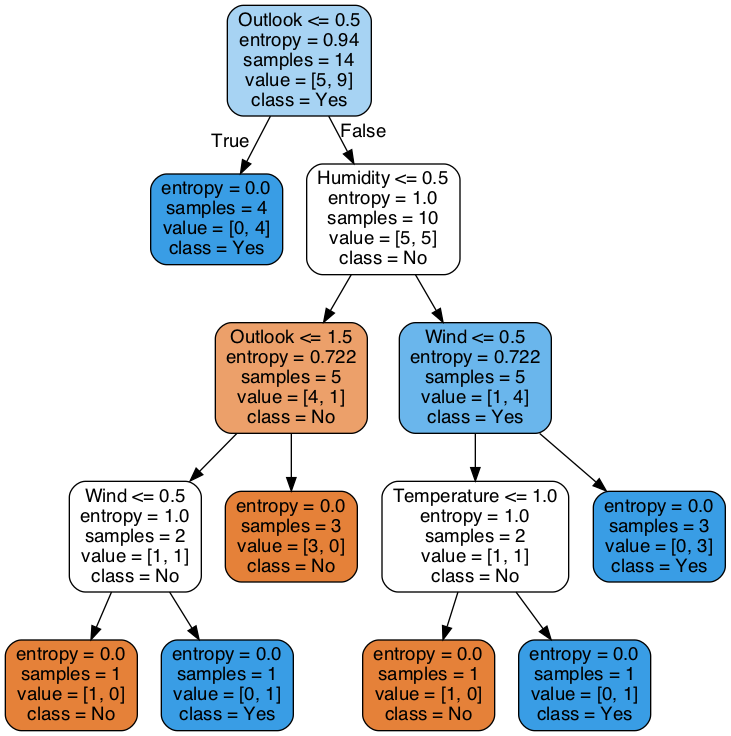

In [169]:
Image(graph.create_png())